In [1]:
import requests
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url_getAllContries ="https://api.covid19api.com/countries"
url_getDayOneTotal = "https://api.covid19api.com/total/dayone/country/{}/status/confirmed"

In [3]:
countries_list=list()

In [4]:
# get list of countries
response = requests.get(url_getAllContries)

In [5]:
content =response.json()

In [6]:
for dicto in content:
    countries_list.append(dicto['Country'])

In [7]:
#[{country:India :[{date: cases}]}]

In [8]:
response = requests.get(url_getDayOneTotal.format("India"))

In [9]:
content = response.json()

In [10]:

date_lst= list()
cases_lst = list()

In [11]:
for dicto in content:
    date1= datetime.datetime.strftime(datetime.datetime.strptime(dicto["Date"], "%Y-%m-%dT%H:%M:%SZ"),"%d-%b")
    case1 = dicto["Cases"]
    date_lst.append(date1)
    cases_lst.append(case1)

In [12]:
import pandas as pd
import numpy as np

In [15]:
df= pd.DataFrame(cases_lst)

In [17]:
df['Date']=date_lst

In [24]:
case_increment= list()
#import pdb
#val1=df.iloc[0,0]
case_increment.append(df.iloc[0,0])
for i in range(1,df.shape[0]):
    #pdb.set_trace()
    #val2= df.iloc[i,0] - val1
    case_increment.append(df.iloc[i,0]-df.iloc[i-1,0])
    
    
df['CasePerDay']=case_increment   

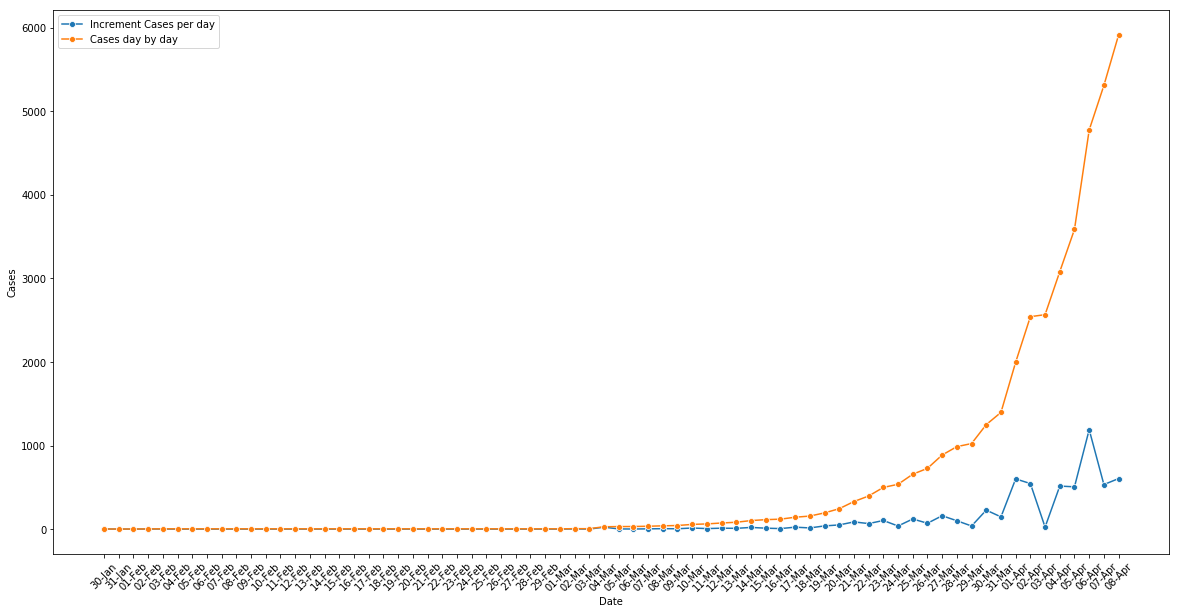

In [32]:
# plot data
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
sns.lineplot(x= df['Date'], y=df['CasePerDay'], marker="o",sort=False, label="Increment Cases per day")
sns.lineplot(x= df['Date'], y=df['Cases'], marker="o",sort=False, label="Cases day by day")


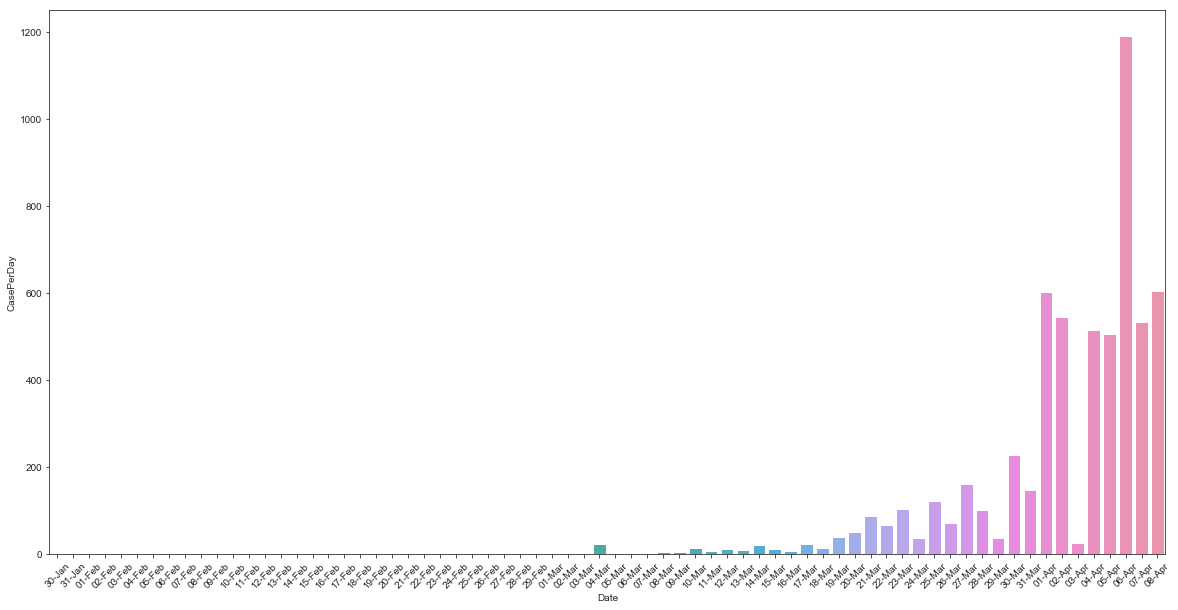

In [49]:
# plot data
sns.set_style("ticks")

plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
sns.barplot(x= df['Date'], y=df['CasePerDay'], label="Increment Cases per day")
plt.show()


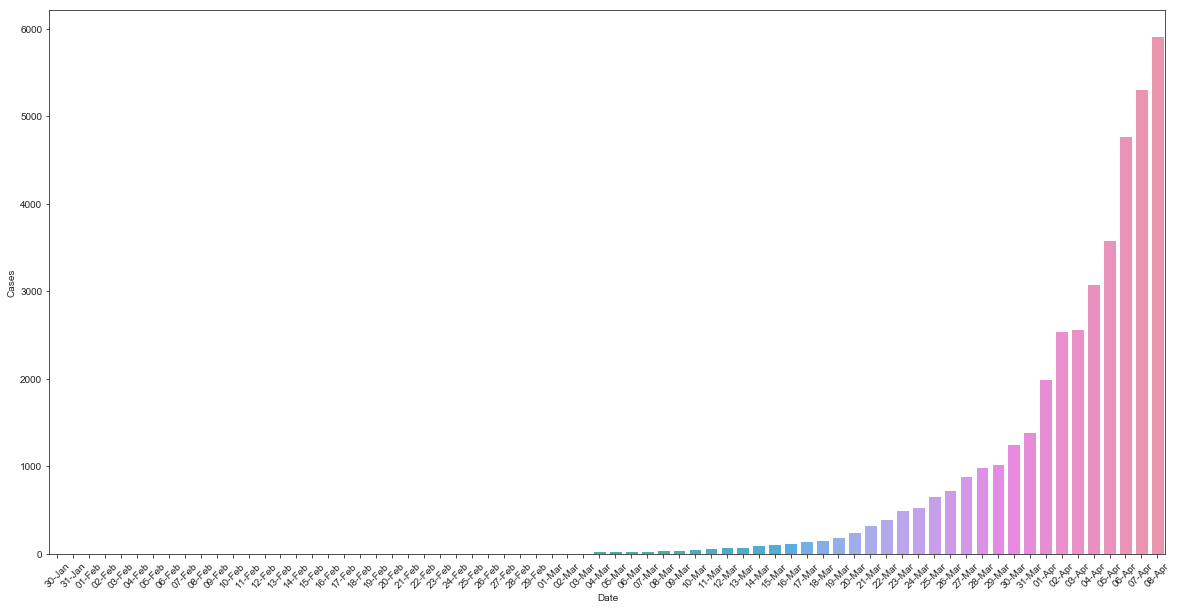

In [48]:
sns.set_style("ticks")

plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
sns.barplot(x= df['Date'], y=df['Cases'], label="Cases day by day")
plt.show()